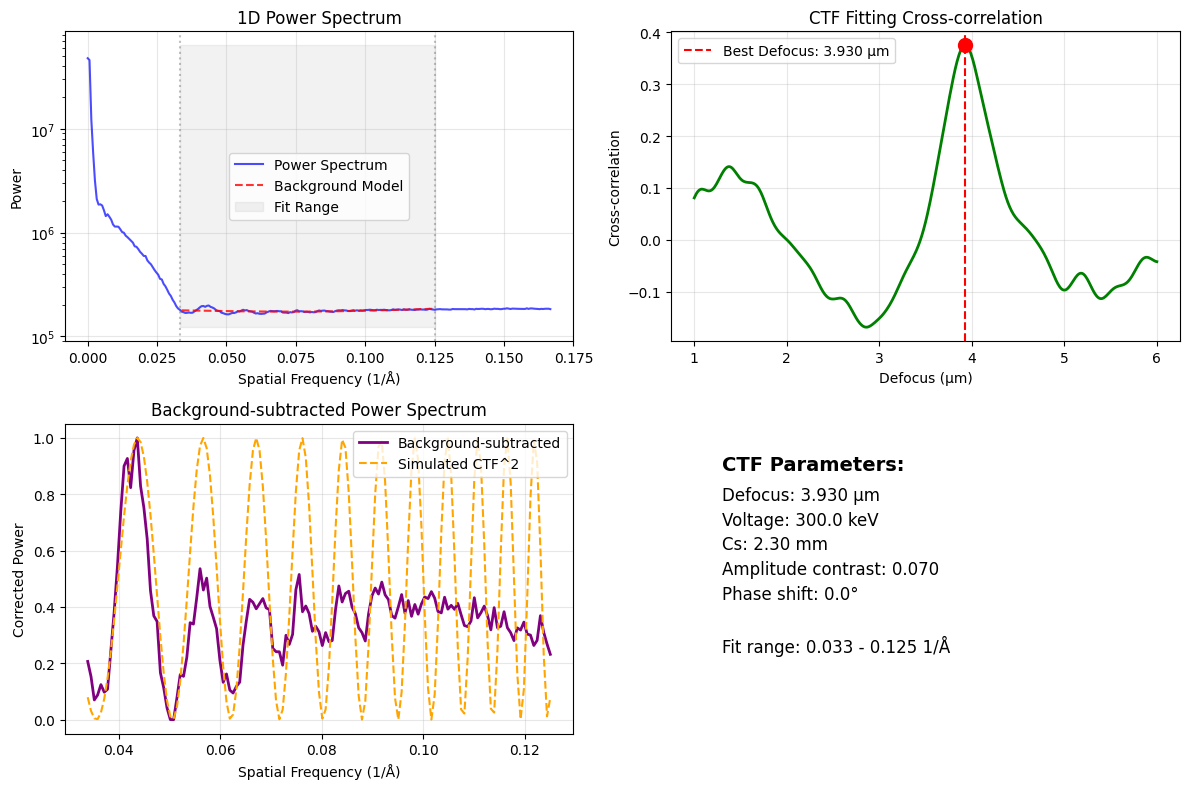

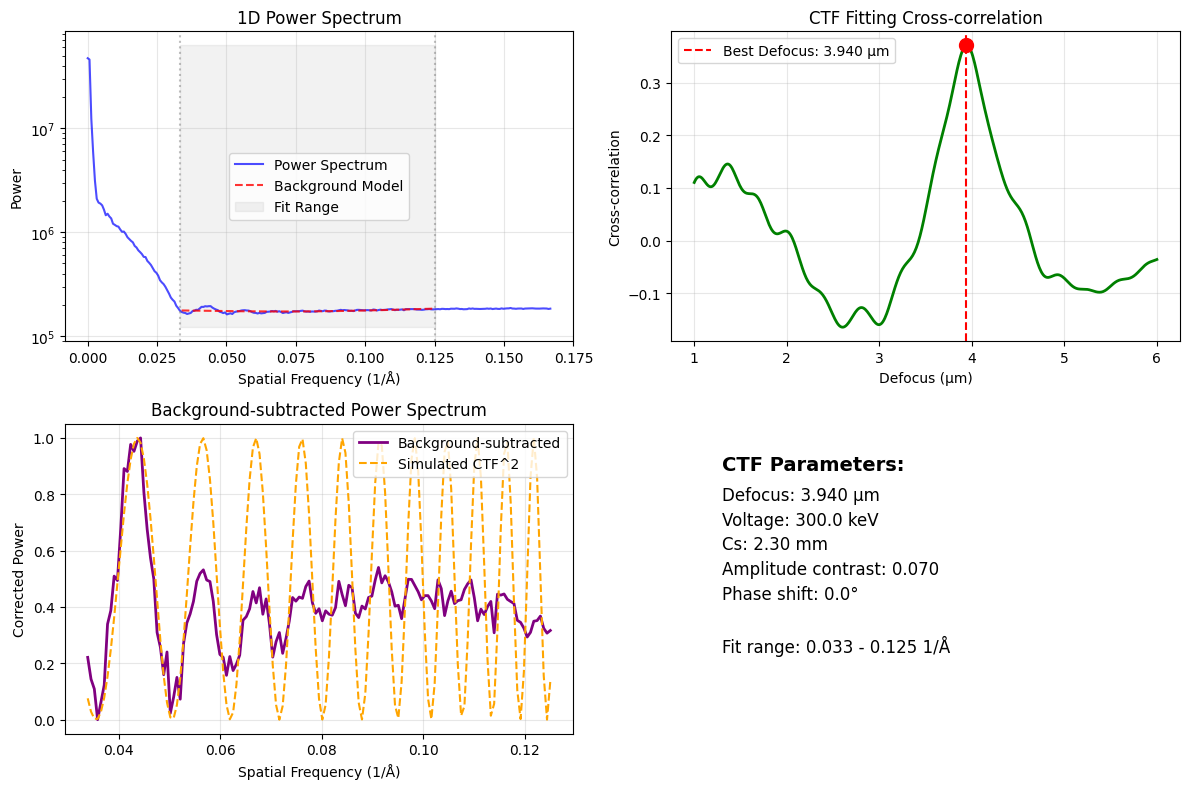

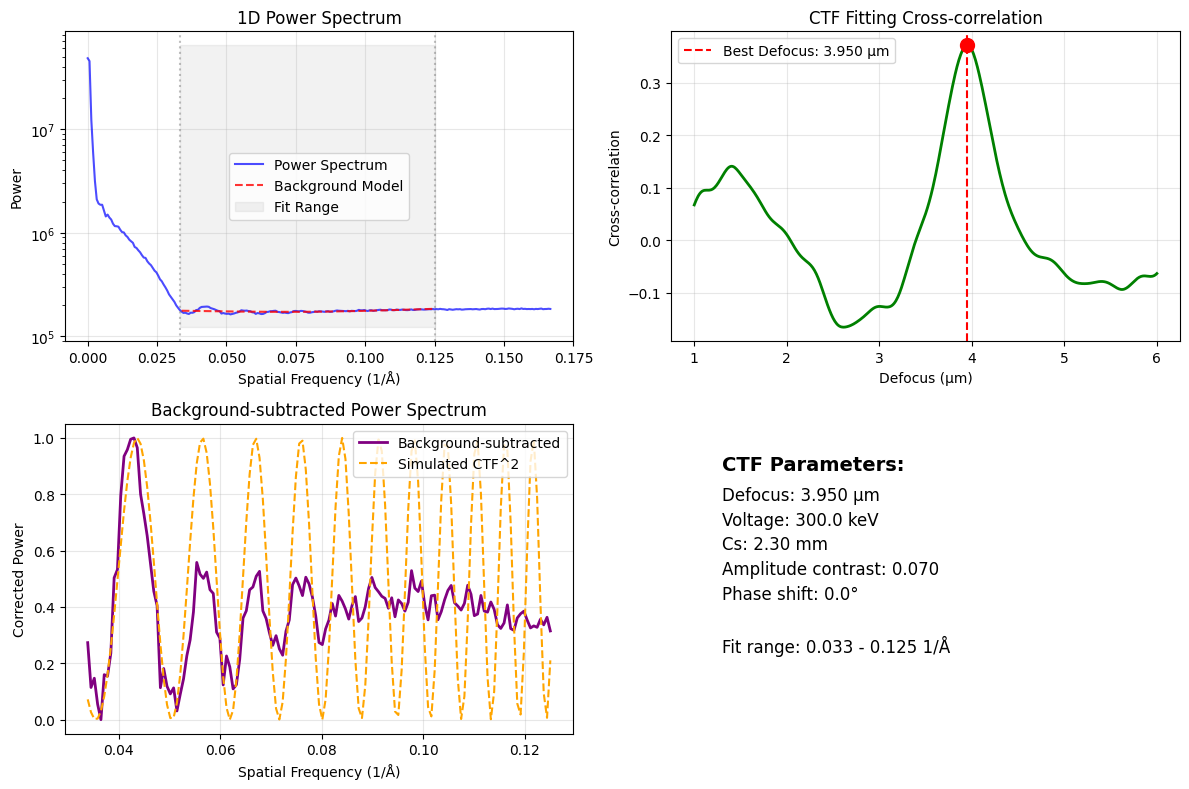

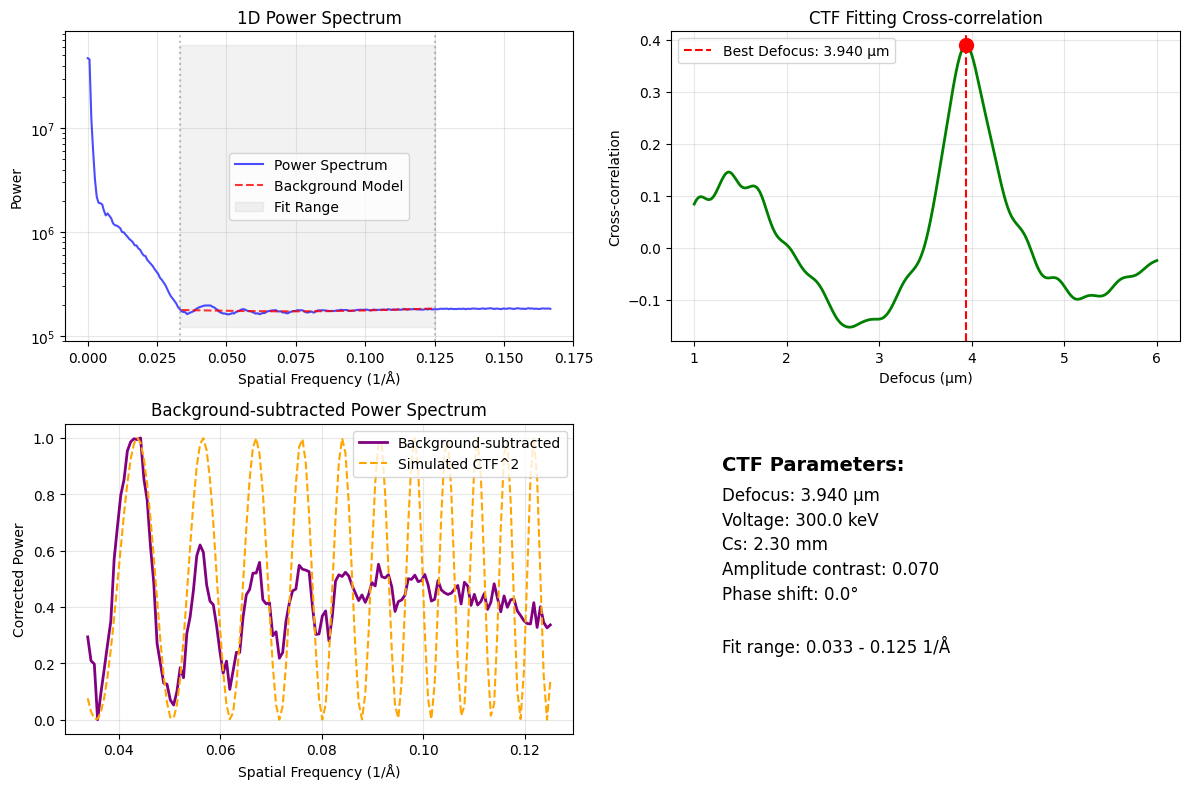

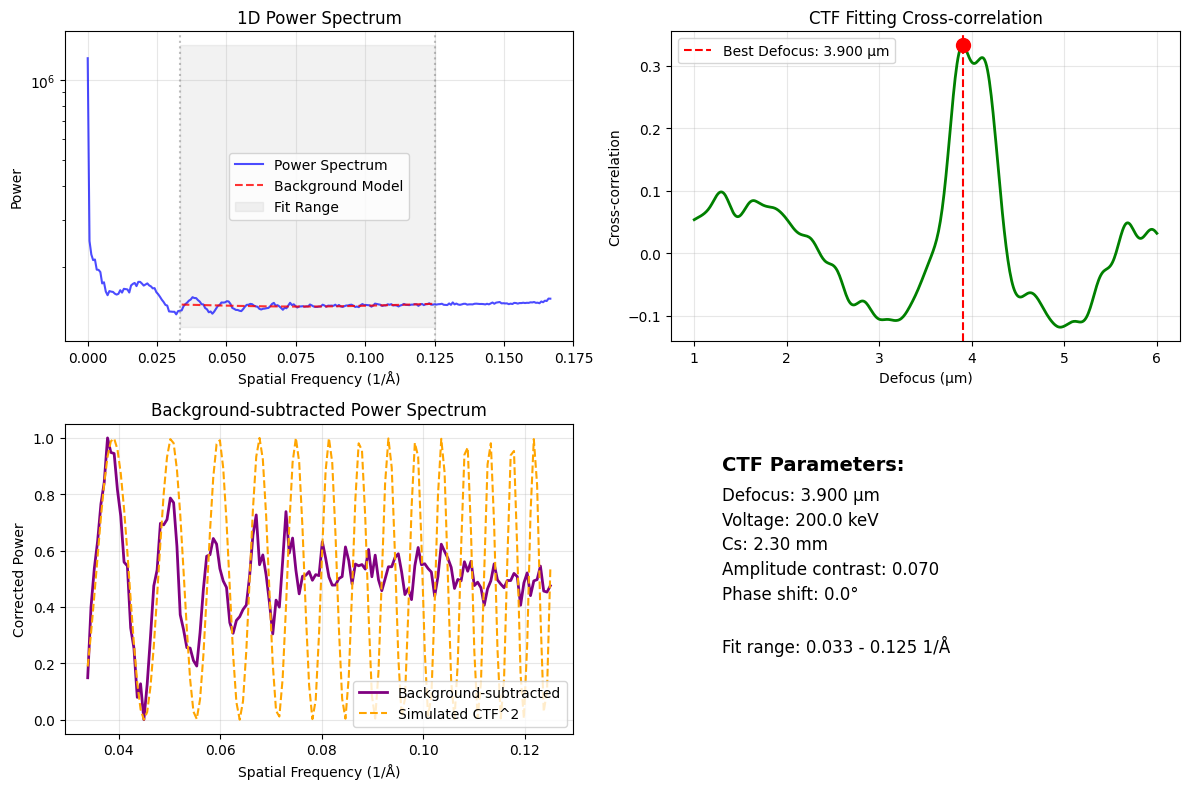

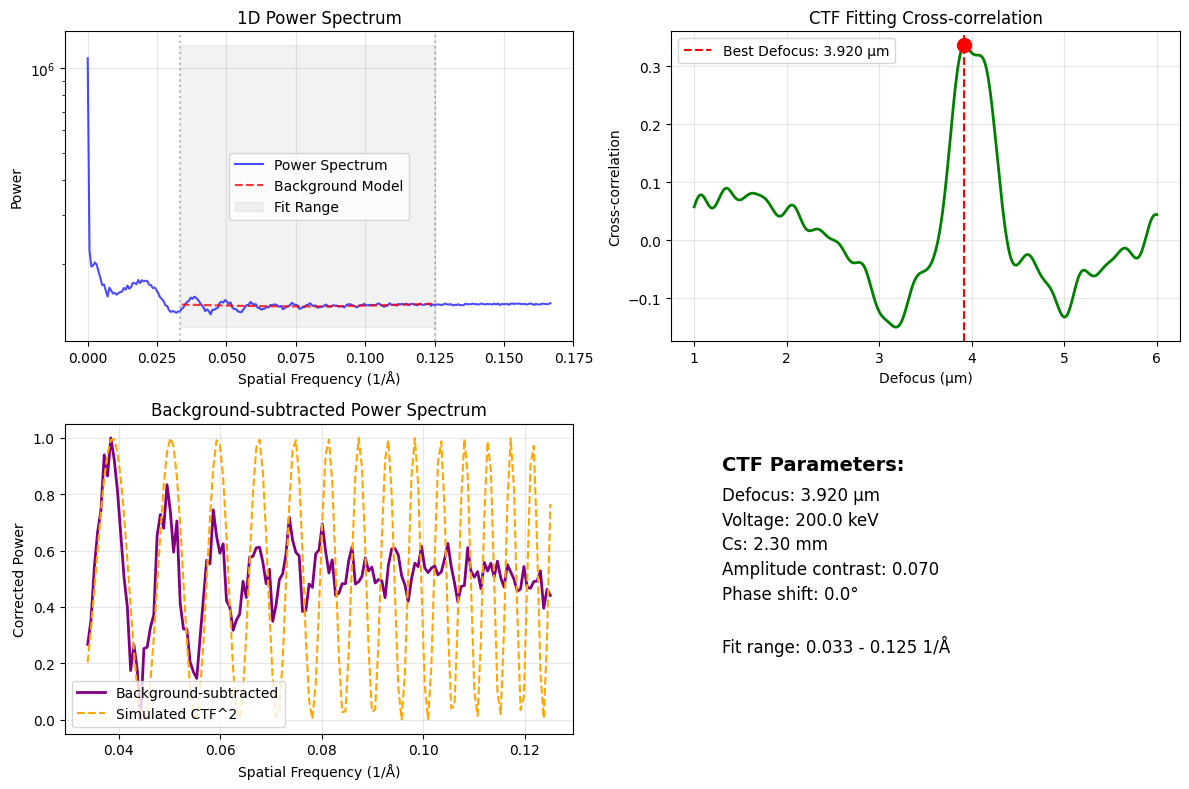

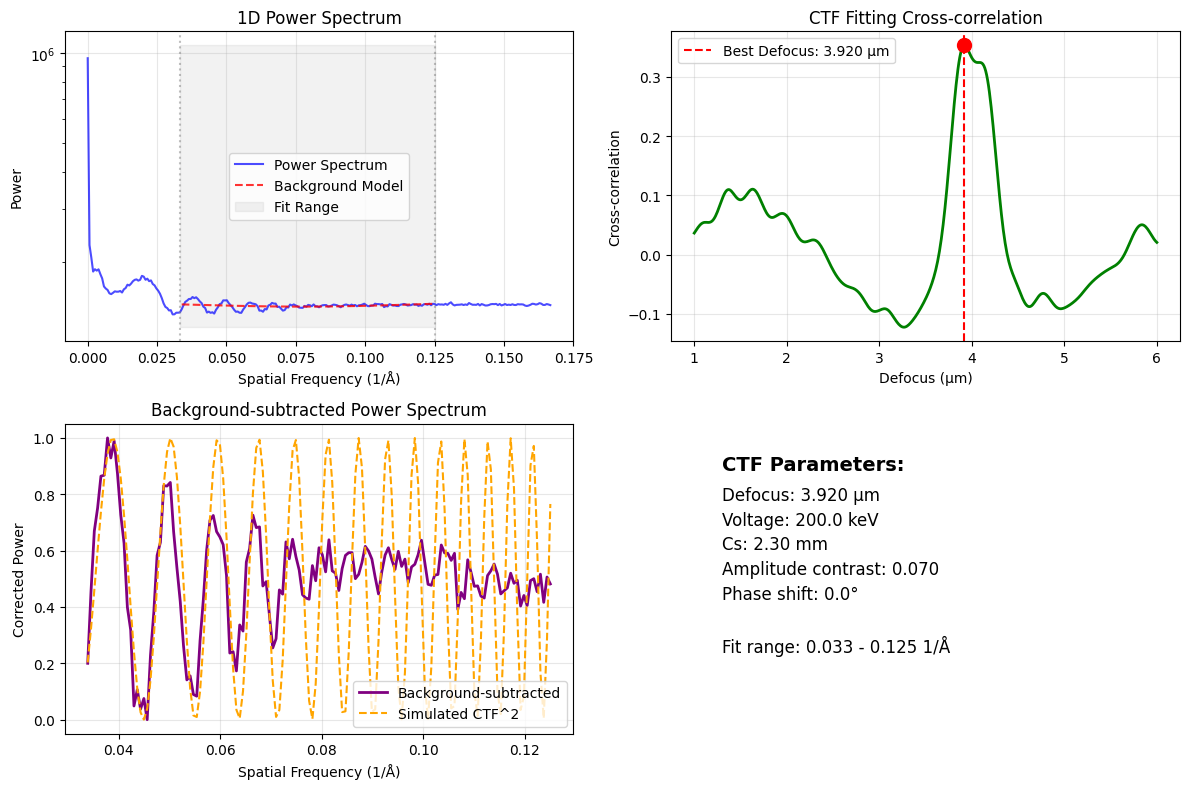

In [1]:
# https://github.com/fatiando/pooch
from pathlib import Path
import pooch
import torch
import mrcfile
import matplotlib.pyplot as plt

from torch_ctf_estimation import estimate_ctf
from torch_fourier_rescale import fourier_rescale_2d

from torch_ctf_estimation.utils.plotting import plot_1d_spectrum

GOODBOY = pooch.create(
    path=pooch.os_cache("torch-ctf-estimation"),
    base_url="https://zenodo.org/records/15871573/files/",
    registry={
        "Dec06_21.44.55-4-s37.mrc": "md5:a400900070223411b12e3db544789459",
        "Dec06_21.44.55-4-s4.mrc": "md5:46aa6b233f288d6af801b6216b3aa4c5",
        "Dec06_21.44.55-4-s5.mrc": "md5:d2bda584c9a4a0e3557bcf0bebc43c11",
        "Dec06_21.44.55-4-s98.mrc": "md5:f1a775fc6e43a9fd98edfe84030622b9",
        "Jul19_18.28.52-5_s1.mrc": "md5:b95b7a2cf8b11bedf38fb7f45c65d99a",
        "Jul19_18.28.52-5_s76.mrc": "md5:822fe9f85fe506993b9ec3099762023b",
        "Jul19_18.28.52-5_s86.mrc": "md5:6ff9d6b9f5da4fe12f639419dfcb873e"
    },
)

METADATA = {
    "Dec06_21.44.55-4-s37.mrc": {
        "pixel_spacing_angstroms": 2.571,
        "spherical_aberration_mm": 2.3,
        "voltage_kev": 300,
        "defocus_u": 4.0149,
        "defocus_v": 3.8507,
        "defocus_angle_deg": 83.09
    },
    "Dec06_21.44.55-4-s4.mrc": {
        "pixel_spacing_angstroms": 2.571,
        "spherical_aberration_mm": 2.3,
        "voltage_kev": 300,
        "defocus_u": 4.4071,
        "defocus_v": 3.9006,
        "defocus_angle_deg": 79.52,
    },
    "Dec06_21.44.55-4-s5.mrc": {
        "pixel_spacing_angstroms": 2.571,
        "spherical_aberration_mm": 2.3,
        "voltage_kev": 300,
        "defocus_u": 4.0252,
        "defocus_v": 3.8954,
        "defocus_angle_deg": 67.9,
    },
    "Dec06_21.44.55-4-s98.mrc": {
        "pixel_spacing_angstroms": 2.571,
        "spherical_aberration_mm": 2.3,
        "voltage_kev": 300,
        "defocus_u": 4.0424,
        "defocus_v": 3.8721,
        "defocus_angle_deg": 74.28
    },
    "Jul19_18.28.52-5_s1.mrc": {
        "pixel_spacing_angstroms": 2.22,
        "spherical_aberration_mm": 2.3,
        "voltage_kev": 200,
        "defocus_u": 4.2322,
        "defocus_v": 3.8140,
        "defocus_angle_deg": 44.26,
    },
    "Jul19_18.28.52-5_s76.mrc": {
        "pixel_spacing_angstroms": 2.22,
        "spherical_aberration_mm": 2.3,
        "voltage_kev": 200,
        "defocus_u": 4.2044,
        "defocus_v": 3.8139,
        "defocus_angle_deg": 40.64,
    },
    "Jul19_18.28.52-5_s86.mrc": {
        "pixel_spacing_angstroms": 2.22,
        "spherical_aberration_mm": 2.3,
        "voltage_kev": 200,
        "defocus_u": 4.2172,
        "defocus_v": 3.8078,
        "defocus_angle_deg": 41.8
    },
}



for key, value in GOODBOY.registry.items():
    image_file = GOODBOY.fetch(key, progressbar=True)
    image = mrcfile.read(image_file)
    image = torch.tensor(image).float()

    mean_ps, result1d, result2d = estimate_ctf(
        image=image,
        pixel_spacing_angstroms=METADATA[key]["pixel_spacing_angstroms"],
        defocus_grid_resolution=(1, 2, 2),
        frequency_fit_range_angstroms=(30, 8),
        defocus_range_microns=(1, 6),
        voltage_kev=METADATA[key]["voltage_kev"],
        spherical_aberration_mm=METADATA[key]["spherical_aberration_mm"],
        amplitude_contrast_fraction=0.07,
        patch_sidelength=512,
    )
    combined_powerspectrum = torch.hstack(
        [torch.flip(mean_ps[:,2:],dims=(1,0)), mean_ps]
    )
    plot_1d_spectrum(result1d)
